In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import pandas_profiling as pp
import sweetviz as sv

In [103]:
df = pd.read_csv("C:/Users/user/Downloads/delivery_time (1).csv")

In [104]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

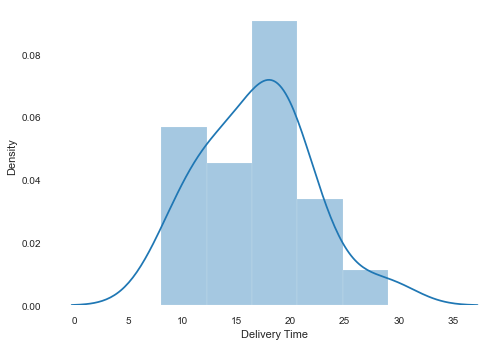

In [106]:
sns.distplot(df['Delivery Time'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

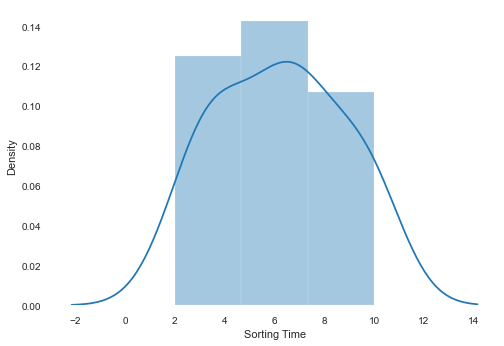

In [107]:
sns.distplot(df['Sorting Time'])

In [108]:
df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [109]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

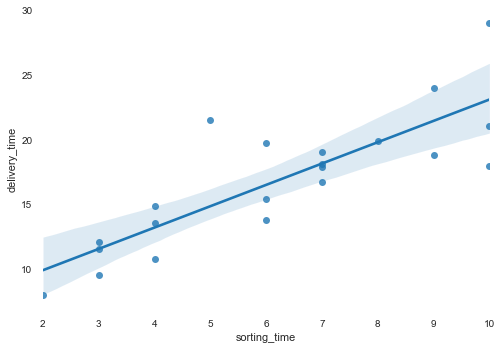

In [110]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [111]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [112]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [150]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [153]:
# Finding coefficient parameters
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [114]:
# Manual prediction for say sorting time
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time


14.827834

In [64]:
# Automatic Prediction for say sorting time 5,8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [65]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [66]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import pandas_profiling as pp
import sweetviz as sv

In [133]:
data=pd.read_csv("C:/Users/user/Downloads/Salary_Data (1).csv")

In [134]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

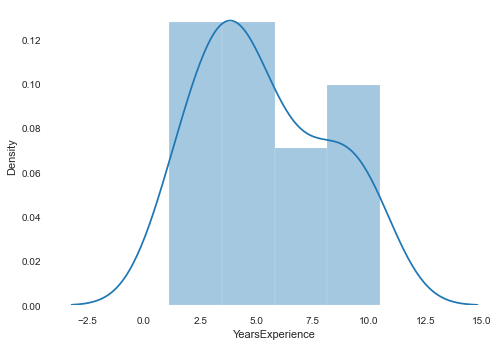

In [136]:
sns.distplot(data['YearsExperience'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

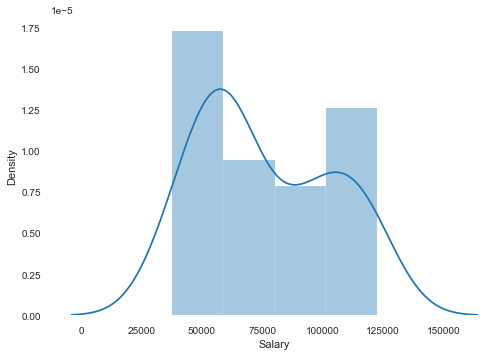

In [137]:
sns.distplot(data['Salary'])

#Correlation Analysis

In [138]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

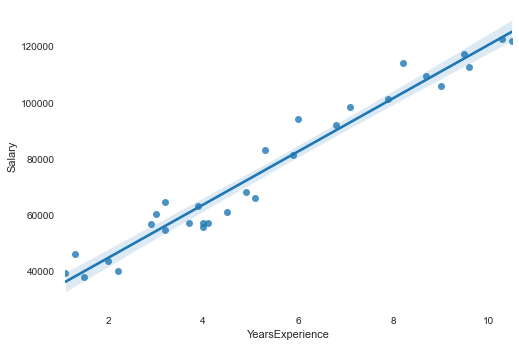

In [139]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

## Model Building

In [140]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

# Model Testing

In [141]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [142]:
# Finding coefficient parameters
#t and p-Values
print(model.tvalues, model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [143]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Model Prediction


In [144]:
# Manual prediction for say 3 years eperience
Salary = (25792.200199) + (9449.962321)*3
Salary

54142.087162

In [145]:
# Automatic prediction for say year 3 & 5 Years expereince
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [148]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [149]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64